In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
data=pd.read_csv('data/raw/Car_details_v3.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7559 entries, 0 to 7558
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7559 non-null   object 
 1   year           7559 non-null   int64  
 2   selling_price  7559 non-null   int64  
 3   km_driven      7559 non-null   int64  
 4   fuel           7559 non-null   object 
 5   seller_type    7559 non-null   object 
 6   transmission   7559 non-null   object 
 7   owner          7559 non-null   object 
 8   mileage        7360 non-null   object 
 9   engine         7360 non-null   object 
 10  max_power      7363 non-null   object 
 11  torque         7359 non-null   object 
 12  seats          7360 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 767.8+ KB


In [53]:
data["year"].unique()

array([2014, 2006, 2010, 2007, 2017, 2001, 2011, 2013, 2005, 2009, 2016,
       2012, 2015, 2018, 2003, 2019, 2020, 2008, 1999, 2000, 1983, 2002,
       2004, 1996, 1994, 1995, 1998, 1997, 1991])

In [54]:
data["fuel"].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [55]:
data["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [56]:
data["transmission"].unique()

array(['Manual', 'Automatic'], dtype=object)

In [57]:
data["owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [58]:
data.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,7559,7559.000000,7.559000e+03,7.559000e+03,7559,7559,7559,7559,7360,7360,7363,7359,7360.000000
unique,2009,NaN,NaN,NaN,4,3,2,5,390,121,317,438,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,117,NaN,NaN,NaN,4104,6295,6576,4916,210,965,362,498,NaN
mean,NaN,2013.813732,6.378509e+05,6.978198e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416576
std,NaN,4.042244,8.012860e+05,5.687792e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955653
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.800000e+05,9.800000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Изучая датасет, стоит обратить внимание на следующие колонки: mileage, engine, max_power, torque - их необходимо отчистить от указанных для них величин

In [59]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          199
engine           199
max_power        196
torque           200
seats            199
dtype: int64

Также стоит отметить наличие нулевых значения в некоторых колонках, следовательно их нужно заменить на медианные значения, преобразовав предварительно 
типы данных 
Переменую seats не будем трогать в виду того, что она относится к категориальной

In [60]:
data.mileage = data.mileage.str[:-5].replace("", None).astype(float)
data.engine = data.engine.str[:-2].replace("", None).astype(float)
data.max_power = data.max_power.str[:-4].replace("", None).astype(float)
del data['torque']

In [61]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7554,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
7555,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
7556,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0
7557,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.90,5.0


Далее проверим наличие объектов с одинаковыми значениями

In [62]:
data.drop(["selling_price"], axis = 1).duplicated().sum()

np.int64(1265)

Отобразим их

In [63]:
data[data.drop(["selling_price"], axis = 1).duplicated()].sort_values(["name"])


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
6806,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73,1968.0,174.33,5.0
7233,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22,2967.0,241.40,5.0
1726,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
2996,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
1450,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01,1968.0,188.00,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3263,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
1594,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
1045,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0
605,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.00,1969.0,190.00,5.0


Далее удалим повторяющиеся строки

In [64]:
data = data.drop_duplicates(subset = list(data.drop(["selling_price"], axis = 1).columns))


In [65]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7553,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
7554,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
7555,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
7556,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


По количеству строк видим, что повторяющиеся элементы были удалены
Далее обновим индексы строк

In [66]:
data = data.reset_index(drop = True)

In [67]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6289,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
6290,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396.0,88.73,5.0
6291,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
6292,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


Вернёмся к пустым строкам и заполним их медианными значениями

In [68]:
data.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          187
engine           187
max_power        188
seats            187
dtype: int64

In [69]:
median_value = data['engine'].median()
data['engine'].fillna(median_value, inplace=True)
median_value = data['mileage'].median()
data['mileage'].fillna(median_value, inplace=True)
median_value = data['max_power'].median()
data['max_power'].fillna(median_value, inplace=True)

In [70]:
data.isna().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
seats            187
dtype: int64

Для дальнейшей наиболее удобной обработки заменим символьные обозначения численными и переведём в соответсввующий тип

In [71]:
data['owner'].replace(['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],[1,2,3,4],inplace=True)
data['seller_type'].replace(['Individual', 'Dealer', 'Trustmark Dealer',],[1,2,3],inplace=True)
data['transmission'].replace(['Manual', 'Automatic'],[1,2],inplace=True)
data['fuel'].replace(['Diesel', 'Petrol', 'LPG', 'CNG'],[1,2,3,4],inplace=True)

In [72]:
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6289,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,2,1,1,2,18.90,998.0,67.10,5.0
6290,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,1,1,1,2,22.54,1396.0,88.73,5.0
6291,Hyundai i20 Magna,2013,320000,110000,2,1,1,1,18.50,1197.0,82.85,5.0
6292,Hyundai Verna CRDi SX,2007,135000,119000,1,1,1,4,16.80,1493.0,110.00,5.0


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6294 entries, 0 to 6293
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6294 non-null   object 
 1   year           6294 non-null   int64  
 2   selling_price  6294 non-null   int64  
 3   km_driven      6294 non-null   int64  
 4   fuel           6294 non-null   int64  
 5   seller_type    6294 non-null   int64  
 6   transmission   6294 non-null   int64  
 7   owner          6294 non-null   object 
 8   mileage        6294 non-null   float64
 9   engine         6294 non-null   float64
 10  max_power      6294 non-null   float64
 11  seats          6107 non-null   float64
dtypes: float64(4), int64(6), object(2)
memory usage: 590.2+ KB


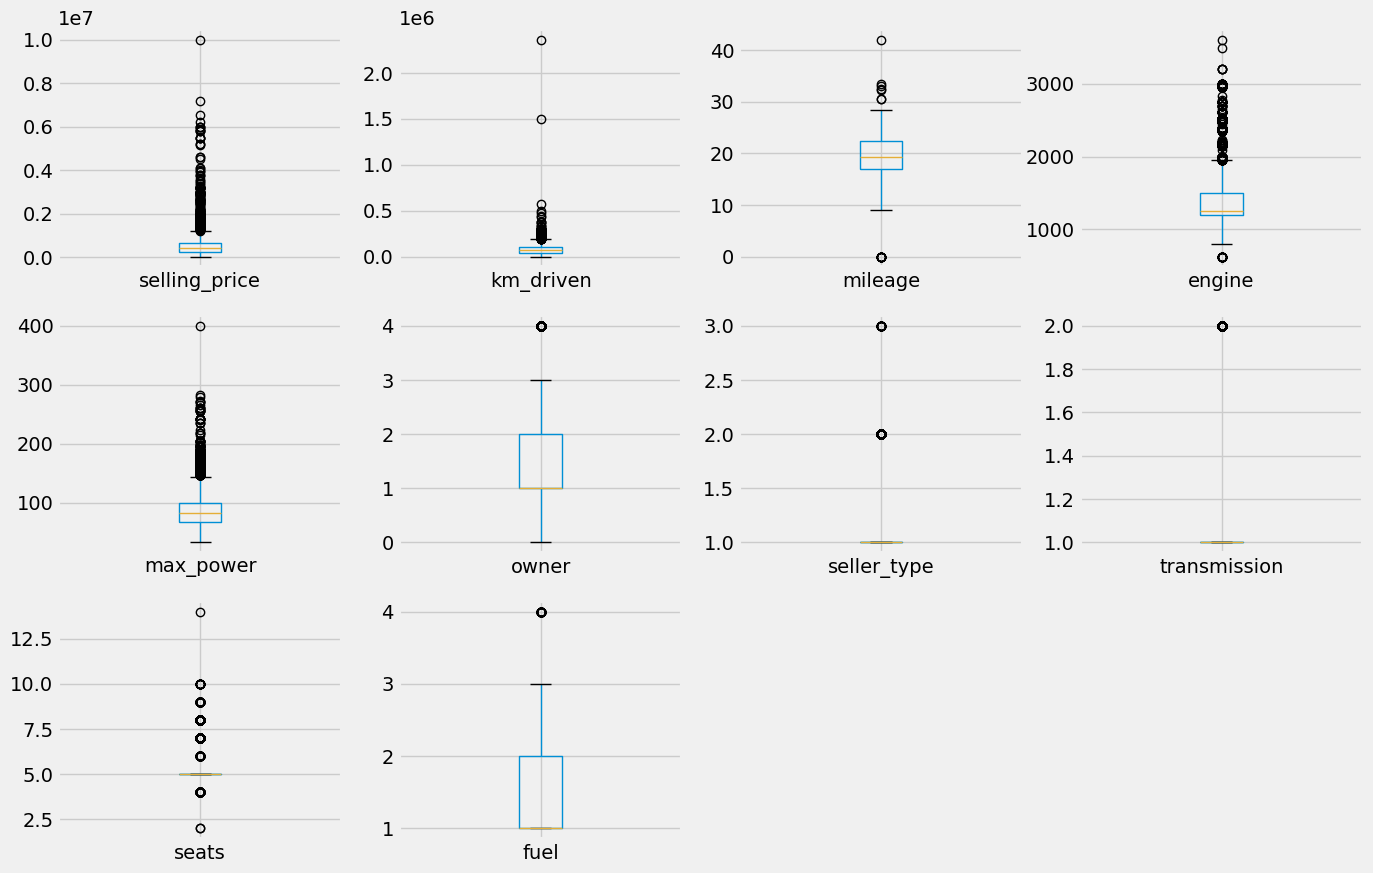

In [198]:
plt.figure(figsize=(15,10))
for i, col in enumerate(['selling_price', 'km_driven','mileage', 'engine', 'max_power', 'owner', 'seller_type', 'transmission', 'seats', 'fuel'], start=1):
    plt.subplot(3, 4, i)
    data.boxplot(col)

Вышеуказанные переменные не являются ошибками в виду специфики самих данных.
К примеру нулевой пробег объясняется типом продавца. Проверил датасет на наличие мотоциклов, что могло бы объяснить разницу в мощности, но как оказалось всё дело в Volvo XC90 T8, у которого действительно 400 лошадиных сил
После того, как данные подготовленны к дальнейшей работе, перейдём к визуализации

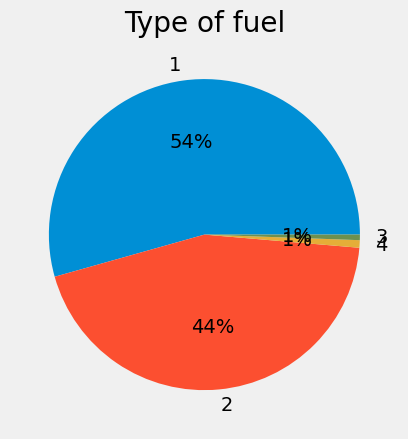

In [225]:
avr = data['fuel'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of fuel")
plt.show()

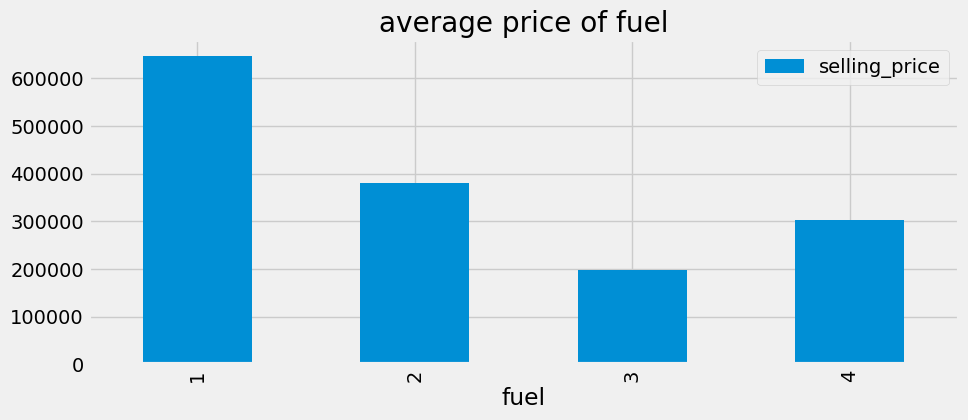

In [220]:
f,ax=plt.subplots(1,figsize=(10,4))

data[['fuel','selling_price']].groupby(['fuel']).mean().plot.bar(ax=ax)
ax.set_title('average price of fuel')
plt.show()

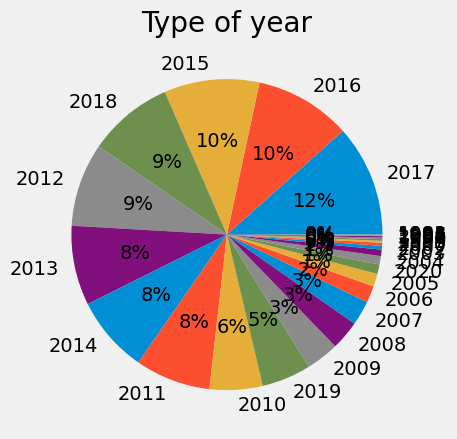

In [224]:
avr = data['year'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of year")
plt.show()

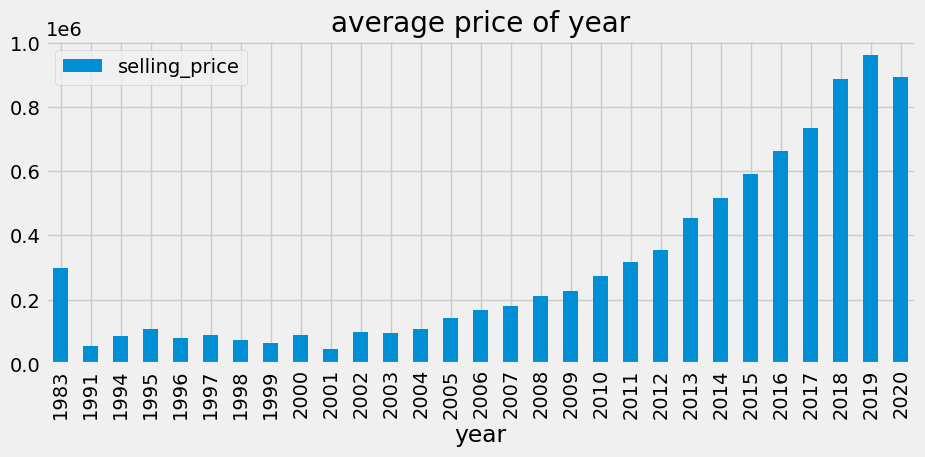

In [204]:
f,ax=plt.subplots(1,figsize=(10,4))
data[['year','selling_price']].groupby(['year']).mean().plot.bar(ax=ax)
ax.set_title('average price of year')
plt.show()

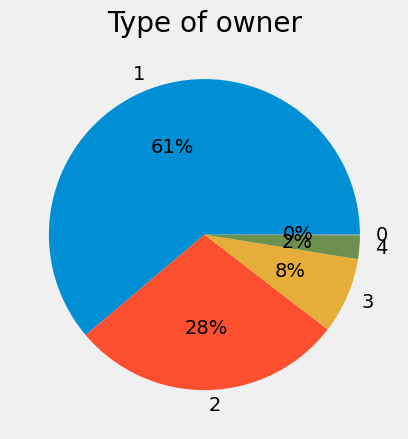

In [222]:
avr = data['owner'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of owner")
plt.show()

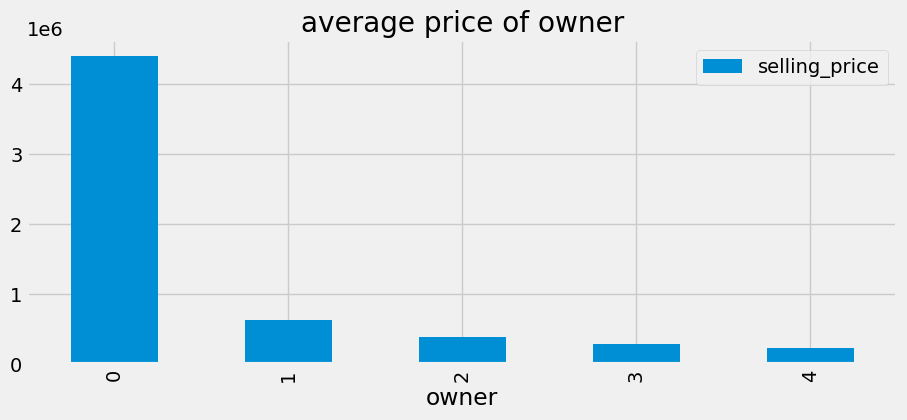

In [209]:
f,ax=plt.subplots(1,figsize=(10,4))
data[['owner','selling_price']].groupby(['owner']).mean().plot.bar(ax=ax)
ax.set_title('average price of owner')
plt.show()

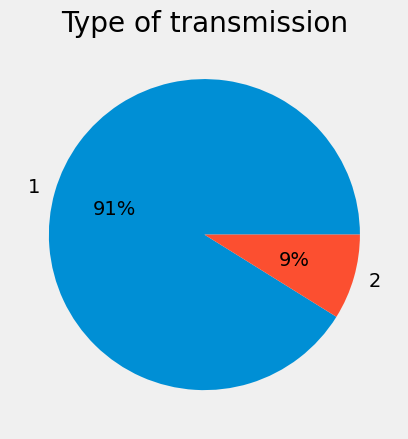

In [227]:
avr = data['transmission'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of transmission")
plt.show()

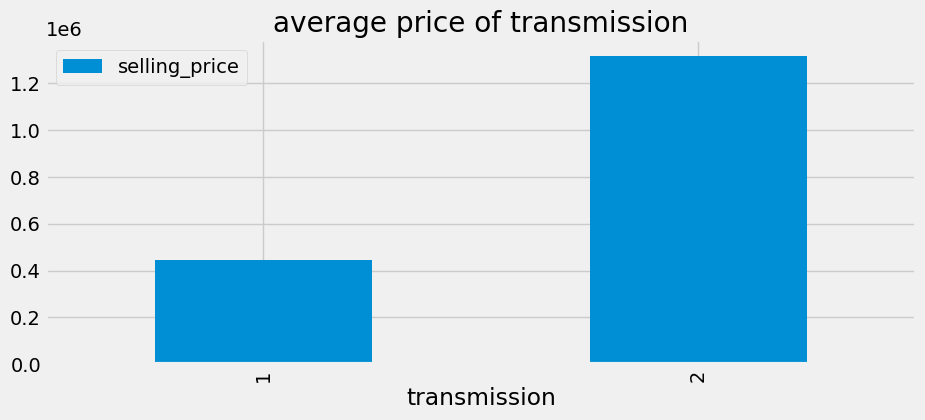

In [226]:
f,ax=plt.subplots(1,figsize=(10,4))
data[['transmission','selling_price']].groupby(['transmission']).mean().plot.bar(ax=ax)
ax.set_title('average price of transmission')
plt.show()

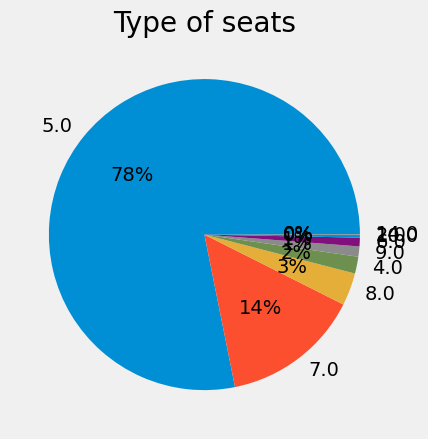

In [228]:
avr = data['seats'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of seats")
plt.show()

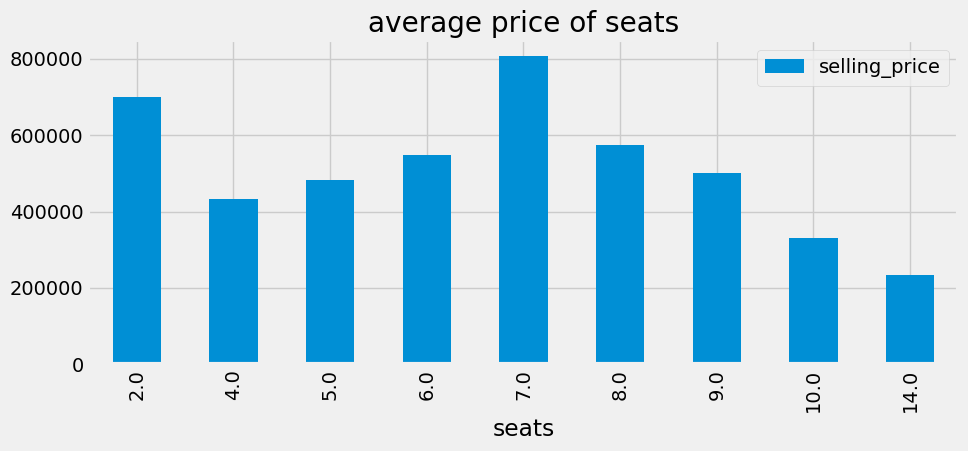

In [214]:
f,ax=plt.subplots(1,figsize=(10,4))
data[['seats','selling_price']].groupby(['seats']).mean().plot.bar(ax=ax)
ax.set_title('average price of seats')
plt.show()

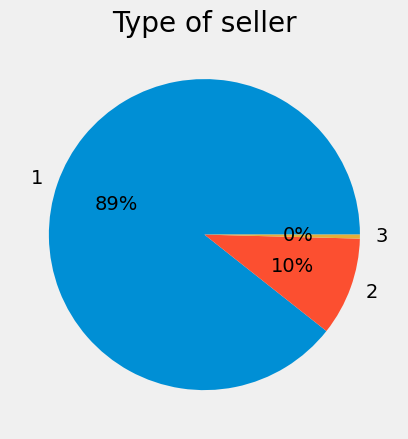

In [230]:
avr = data['seller_type'].value_counts()
plt.pie(avr, labels=avr.index, autopct='%.0f%%')
plt.title("Type of seller")
plt.show()

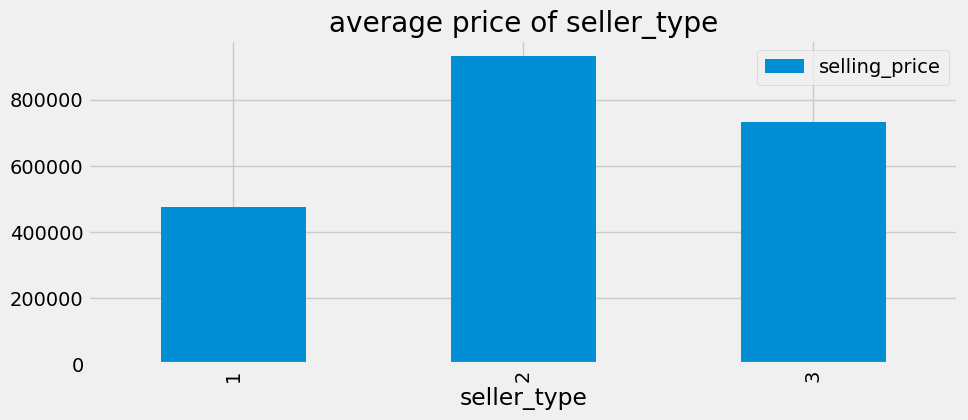

In [213]:
f,ax=plt.subplots(1,figsize=(10,4))
data[['seller_type','selling_price']].groupby(['seller_type']).mean().plot.bar(ax=ax)
ax.set_title('average price of seller_type')
plt.show()

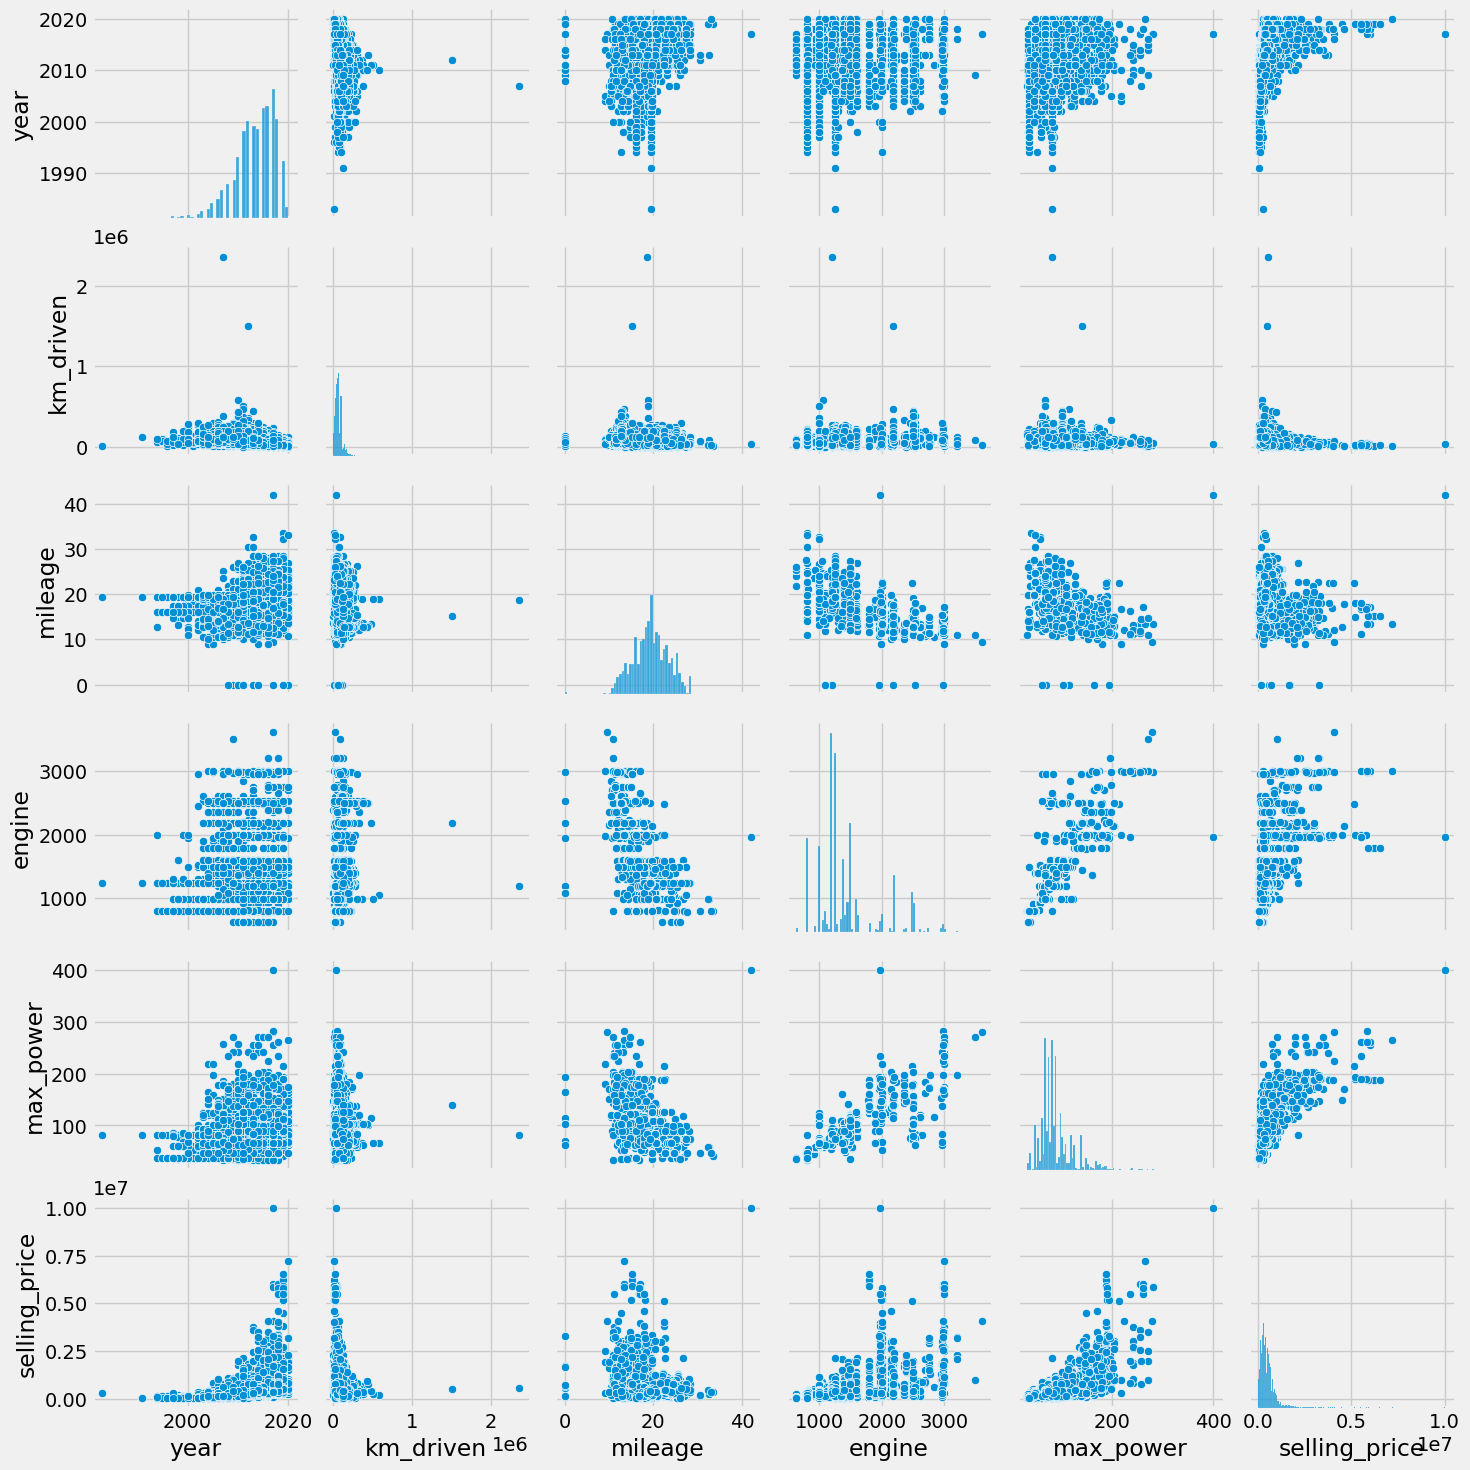

In [187]:
sns.pairplot(data[['year', 'km_driven', 'mileage', 'engine', 'max_power'] + ['selling_price']])

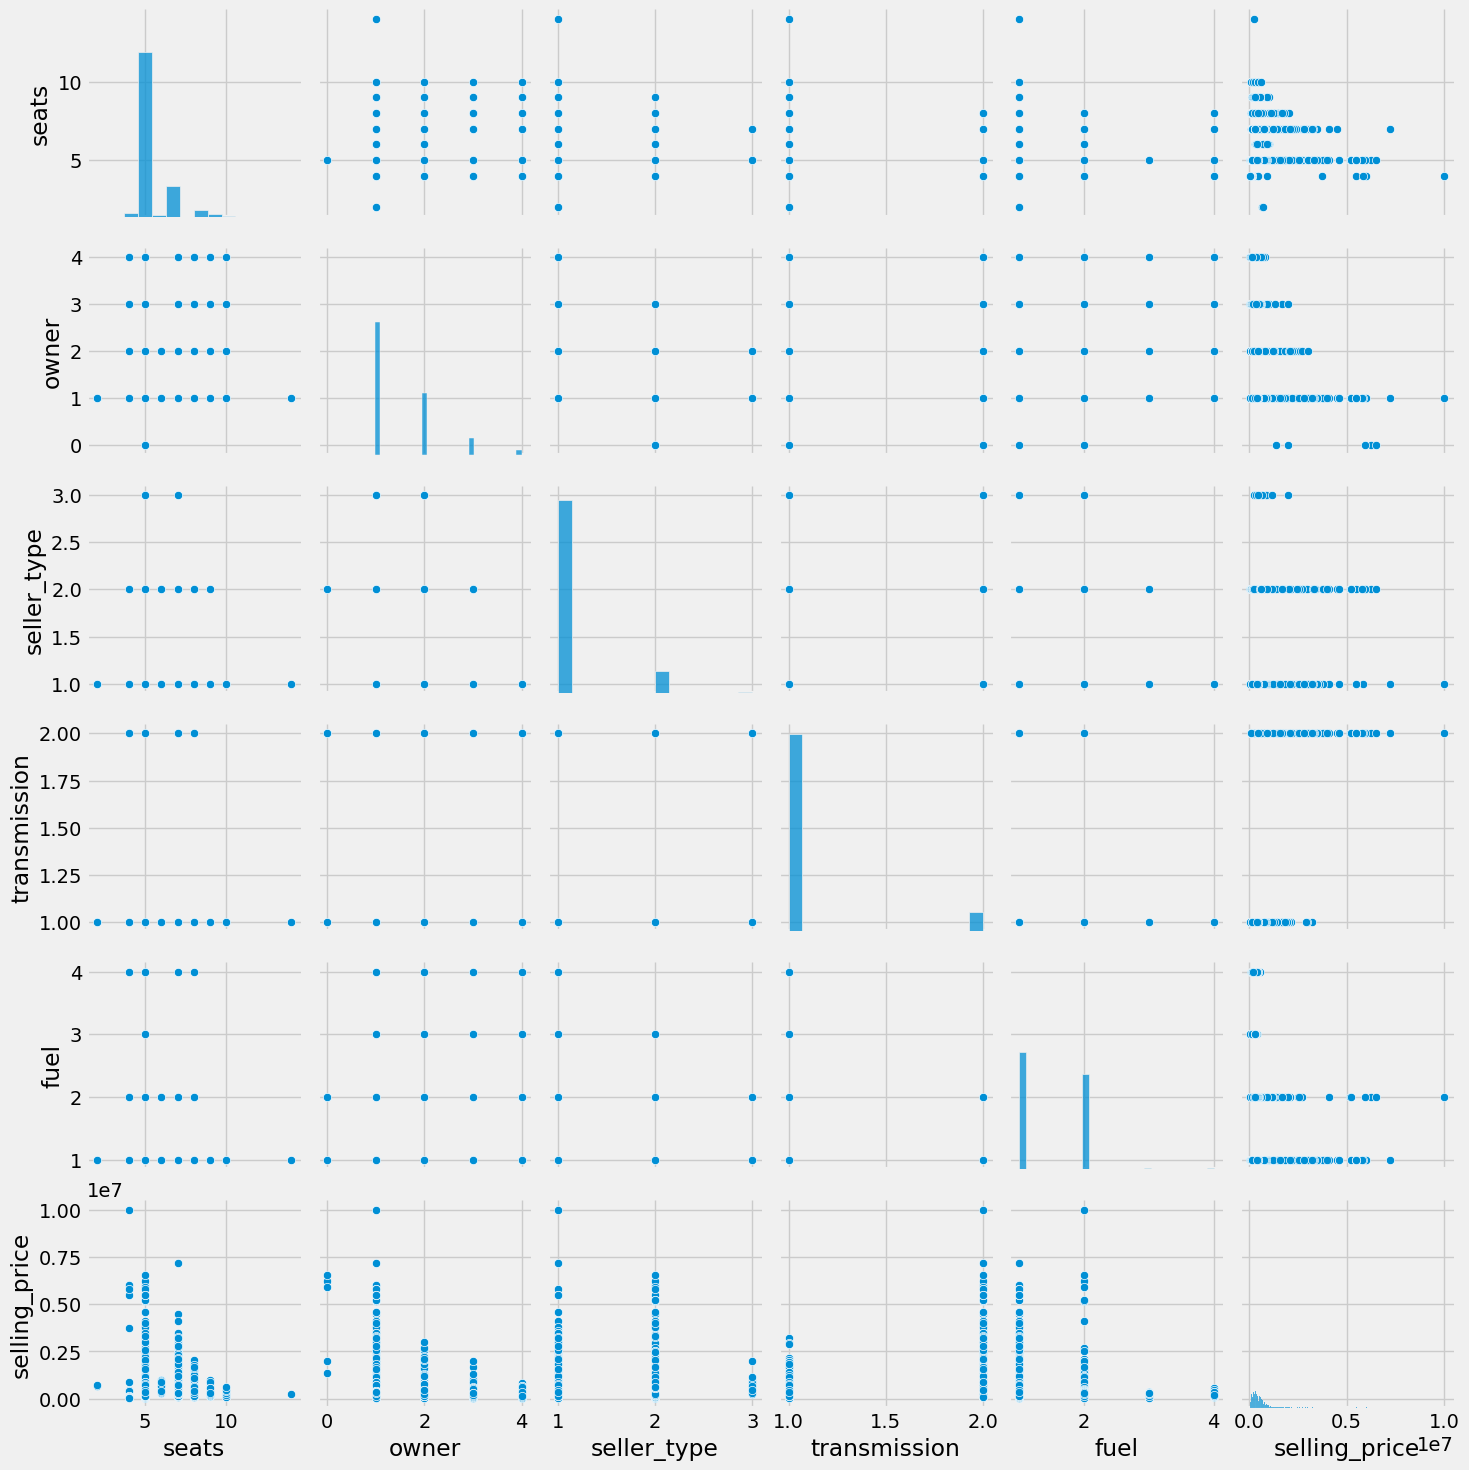

In [199]:
sns.pairplot(data[['seats', 'owner', 'seller_type', 'transmission', 'fuel'] + ['selling_price']])

<Axes: >

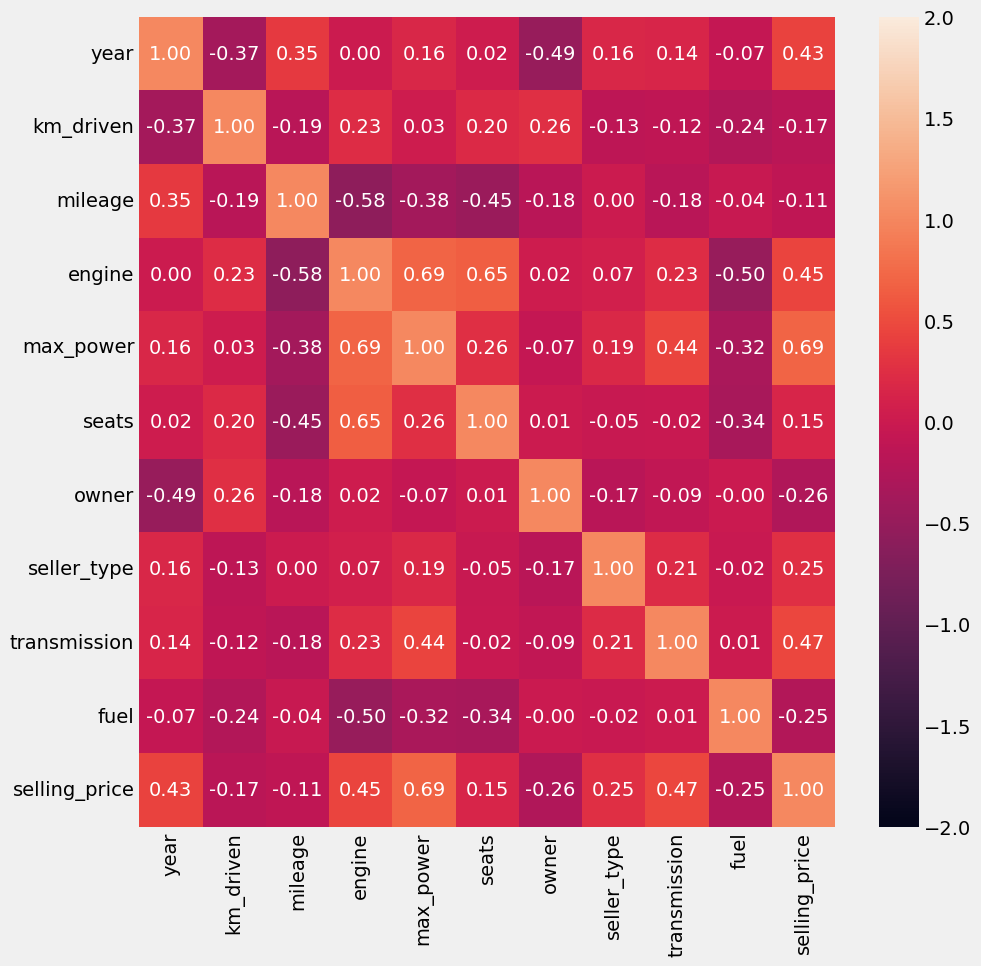

In [200]:
plt.figure(figsize = (10, 10))
sns.heatmap(data[['year', 'km_driven', 'mileage', 'engine', 'max_power',  'seats', 'owner', 'seller_type', 'transmission', 'fuel'] + ['selling_price']].corr(), annot=True, fmt=".2f", vmin= -2, vmax = 2)

Исходя из тепловой карты можно понять следующее: наиболее скореллированны между собой max_power и engine, графики которых построим далее, а наименее скореллированны engine и mileage

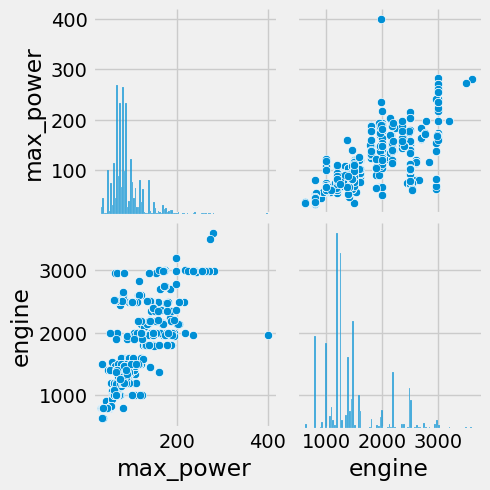

In [146]:
sns.pairplot(data[["max_power", "engine"]])

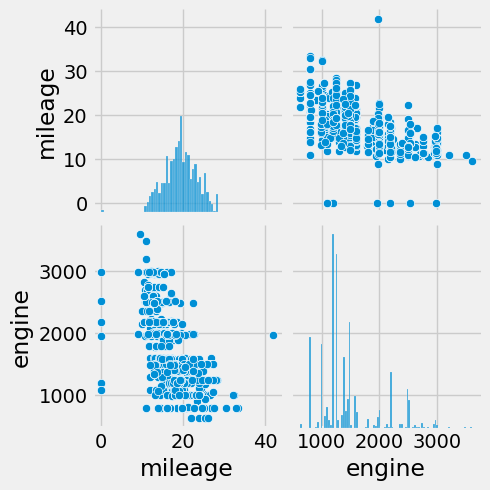

In [147]:
sns.pairplot(data[["mileage", "engine"]])

Рассмотрим также корелляцию с selling_price - наиболее положительно скореллированна с годом, объёмом двигателя и максимальной мощностью. Отрицательно же с расходом топлива и километрами пробега

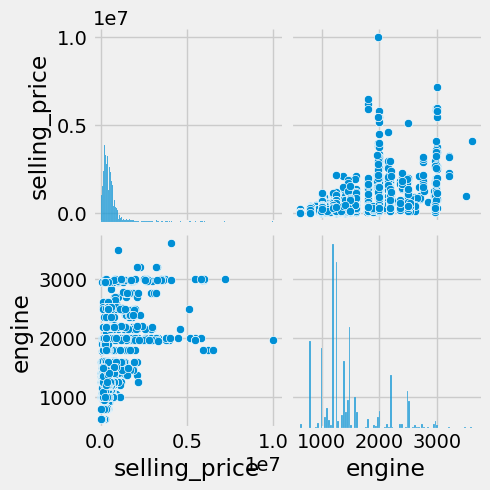

In [148]:
sns.pairplot(data[["selling_price", "engine"]])

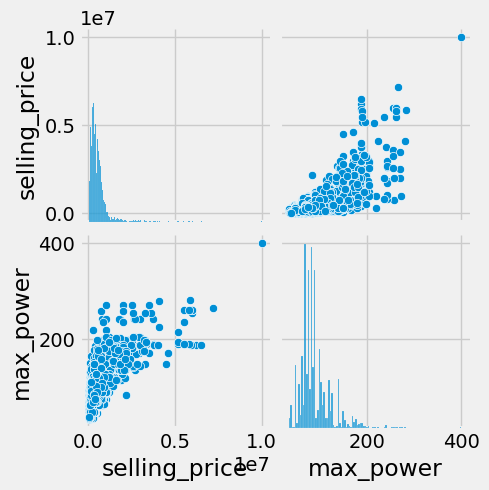

In [149]:
sns.pairplot(data[["selling_price", "max_power"]])

Подводя итог, считаю необходимым удаление следующих столбцов, как наименее важных: количество сидений, тип топлива, количество валдельцев и максимальная мощность

In [75]:
del data['owner']
del data['seats']
del data['fuel']

In [76]:
del data['max_power']

In [77]:
data

,name,year,selling_price,km_driven,seller_type,transmission,mileage,engine
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,1,1,17.70,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,23.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,1,1,16.10,1298.0
...,...,...,...,...,...,...,...,...
6289,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,1,1,18.90,998.0
6290,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,1,1,22.54,1396.0
6291,Hyundai i20 Magna,2013,320000,110000,1,1,18.50,1197.0
6292,Hyundai Verna CRDi SX,2007,135000,119000,1,1,16.80,1493.0


Также стоит удалить наименование авто 

In [78]:
del data['name']

In [79]:
data

,year,selling_price,km_driven,seller_type,transmission,mileage,engine
0,2014,450000,145500,1,1,23.40,1248.0
1,2014,370000,120000,1,1,21.14,1498.0
2,2006,158000,140000,1,1,17.70,1497.0
3,2010,225000,127000,1,1,23.00,1396.0
4,2007,130000,120000,1,1,16.10,1298.0
...,...,...,...,...,...,...,...
6289,2013,260000,50000,1,1,18.90,998.0
6290,2014,475000,80000,1,1,22.54,1396.0
6291,2013,320000,110000,1,1,18.50,1197.0
6292,2007,135000,119000,1,1,16.80,1493.0
